In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline
titanic_data = pd.read_csv('titanic_data.csv')
# Cleaning the data 
titanic_data = titanic_data[titanic_data['Age'].notnull()]
def get_female_amount_from_dataframe(dataframe):
    return dataframe[dataframe['Sex'] == 'female']['PassengerId'].count()
def get_percentage(numerator,denumerator):
    return str(round(numerator/float(denumerator)*100,2))

For the first, we tale a look at the relation between Pclass to survied peopeo. The higher pclass passenger have a higher posibility to survived.

In [174]:
print titanic_data.groupby('Pclass')['Survived'].mean()


Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64


For the second, the female passenger will also have a great chance to survived.

In [175]:
print titanic_data.groupby('Sex')['Survived'].mean()

Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64


We can see the data below that sex is most importance variable for the survived.

In [176]:
print titanic_data.groupby(['Sex','Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.964706
        2         0.918919
        3         0.460784
male    1         0.396040
        2         0.151515
        3         0.150198
Name: Survived, dtype: float64


# Dose children have higher chance to survive?

We can see the histogram blow. This is the distribution on age variable. We can obviously see gap at the 10. Most of the children was followed with their parent. We can also make a conclusion that most of the passenger age are from 15 to 40.

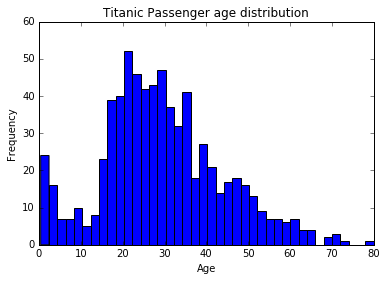

In [177]:
titanic_data['Age'].plot(kind='hist',bins = 40,title='Titanic Passenger age distribution', x = 'age').set_xlabel("Age")

I also want to find the children survive status. Let us find out the survive status from 0-10.

In [178]:
survivor_children = survivor_data[survivor_data['Age']<=10]
whole_children = titanic_data[titanic_data['Age']<=10]
more_than_10_passenger = titanic_data[titanic_data['Age'] >10]
print 'The percentage of children in whole population:\n' + get_percentage(whole_children['PassengerId'].count(),titanic_data['PassengerId'].count()) + '%'
print 'The percentage of survivor in children. \n' + get_percentage(survivor_children['PassengerId'].count(),whole_children['PassengerId'].count())+ '%'

The percentage of children in whole population:
8.96%
The percentage of survivor in children. 
59.38%


Let us seprate the survivor and victim and describe the age and fare(It is meanless to describe other column). 

In [179]:
survivor_data = titanic_data.groupby('Survived').get_group(1)
victim_data = titanic_data.groupby('Survived').get_group(0)
print 'Survivor describe:\n'+ str(survivor_data.loc[:,['Age','Fare']].describe())
print 'Victim describe:\n' + str(victim_data.loc[:,['Age','Fare']].describe())

Survivor describe:
              Age        Fare
count  290.000000  290.000000
mean    28.343690   51.843205
std     14.950952   70.458776
min      0.420000    0.000000
25%     19.000000   13.000000
50%     28.000000   26.250000
75%     36.000000   66.200000
max     80.000000  512.329200
Victim describe:
              Age        Fare
count  424.000000  424.000000
mean    30.626179   22.965456
std     14.172110   31.448825
min      1.000000    0.000000
25%     21.000000    7.895800
50%     28.000000   11.887500
75%     39.000000   26.550000
max     74.000000  263.000000


We can see that there is no too much different on age, but there is huge different for fare of the ticket. Most of the survivors' ticket fare are more than 26 dollar. In victim, 75 percent of  the passenger ticket fare is lowwer than 26 dollar. The plot below shows that most of the suvived passenger's ticket fare is higher than victim.

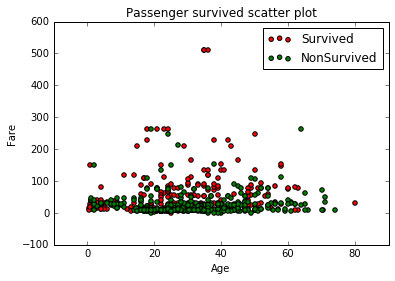

In [180]:
ax = survivor_data.plot(kind='scatter', x='Age', y='Fare',color='Red', label='Survived');
victim_data.plot(kind='scatter', x='Age', y='Fare',color='Green', label='NonSurvived',ax=ax,title='Passenger survived scatter plot');

We can make a conclusion that female, children and rich man people is most likely survive

# Which is the place for most rich people embarked. Which is the place for the poor people embarked?

We can see the plot below that most of the people coming from 'S'. But the percentage of rich people in 'C' is higher than other place.

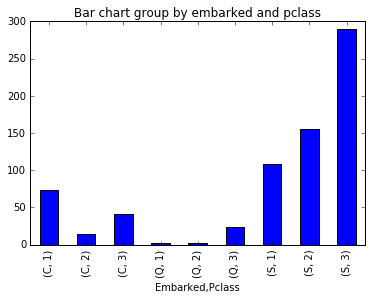

In [181]:
titanic_data.groupby(['Embarked','Pclass'])['PassengerId'].count().plot.bar(title = 'Bar chart group by embarked and pclass')

We can also see that most the passenger is the poor people from 'S'.

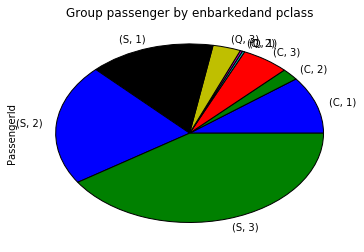

In [182]:
titanic_data.groupby(['Embarked','Pclass'])['PassengerId'].count().plot.pie(title = 'Group passenger by enbarkedand pclass')

# Chi-square test between gender to survived.
Null hypotheses and Alternative hupotheses 

H0: Gender and Survived are independent.

HA: Gender and Survived are not indenpendent.

For this analysis, we use significance level is 0.05. And we also use chi-square to conduct this data.


In [183]:
print "male Passenger amount:" + str(titanic_data[titanic_data['Sex'] == 'male']['PassengerId'].count())
print 'female Passenger amount:' + str(titanic_data[titanic_data['Sex'] == 'female']['PassengerId'].count())

male Passenger amount:453
female Passenger amount:261


DF = (2-1)\*(2-1) = 1

|  Expectation      | Survived | NotSurvived | total number|
|--------|----------|-------------|-----------|
| male   |     226.5     |       226.5      |453|
| female |      130.5    |       130.5      |261|
|total number|357|357|714|


In [184]:
print stats.chisquare([survivor_data[survivor_data['Sex'] == 'female']['PassengerId'].count(),survivor_data[survivor_data['Sex'] == 'male']['PassengerId'].count()],[130.5,226.5]);

Power_divergenceResult(statistic=112.57240364365279, pvalue=2.6770807011239853e-26)


Since the P-Value(2.677e-26) is far less than 0.05, we can't accept the null hypothesis. We conclude that these is an relationship between Sex and Survived.

# Limitations of data

There are about 170 passengers have no value on age. The percentage is 19.9% in whole population.It might be have impact to the result conclusion but not too huge impact. There is no appropriate value for these NaN value. Just omitting these records. 

If We are not create the statistic test for the variable. We are only make the instution conclusion that gender and pclass is correlate to the survived rate . But if we create a statistic test for it, we can know how far these two variable dependent.   

There also might missing some column not been included. Such as Passenger income, job, etc. 

# Summry

The female passengers survived chance is about 3 times than male. The first class passenger survived chance is 3 times than 2nd class and 1.5 time than 3 class.  The sex is more importent factor than Pclass. 